In [1]:
from helpers import * 
from processor import *

ic| cut_vertices: [7, 0]


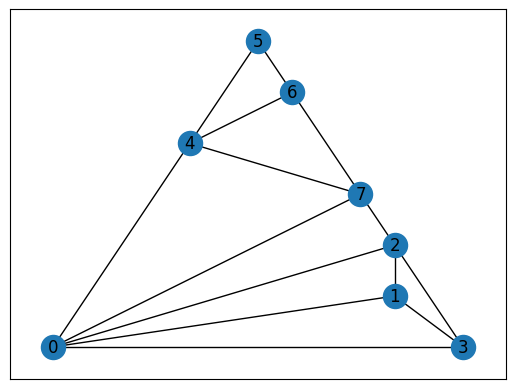

In [2]:
G_st = st_graph()   
p = Processor(G_st)
p.augment()
pos = plot_planar(p.G, p.embed)

ic| tri.target_edge: (0, 3)
ic| 'same y', n1_y: -0.3620689655172414, n2_y: -0.3620689655172414
ic| len(l3_cycles): 8, m: 16, n: 9, m - n + 1: 8


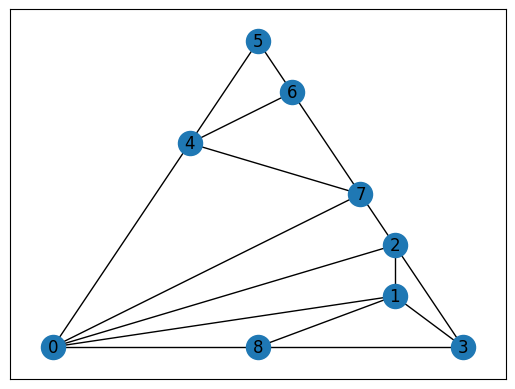

In [3]:
p.fix_separating_triangles()
plot_planar(p.G, p.s.embed)

ic| directions: {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.05747126436781608, 0.23563218390804597),
                 'south': (-0.5862068965517242, -0.3620689655172414),
                 'west': (-0.5862068965517242, -0.3620689655172414)}
ic| directions: {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.05747126436781608, 0.23563218390804597),
                 'south': (-0.5862068965517242, -0.3620689655172414),
                 'west': (-0.5402298850574713, 0.09770114942528735)}
ic| 'Passes planarity check'


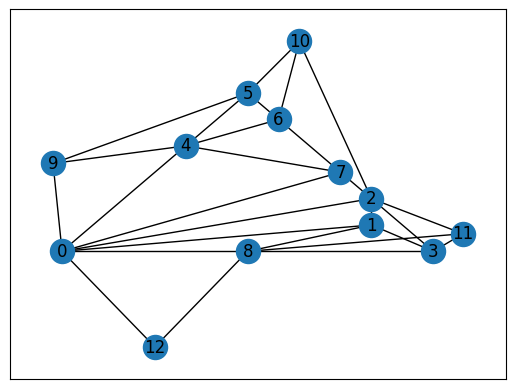

In [4]:
p.fix_cips()
p.add_corner_nodes()
plot_planar(p.b.G, p.b.embed)


In [5]:
corner_node_data = p.b.corner_node_data
def get_node_index(key):
    dict_key = get_key_by_value(corner_node_data, key, object=True)
    return corner_node_data[dict_key].node


In [6]:
corner_node_data

{0: CornerNode({'interior_nodes': [0, 4, 5], 'name': 'west', 'node': 9, 'location': (-1.0402298850574714, 0.09770114942528735), 'mean_location': (-0.5402298850574713, 0.09770114942528735)}),
 1: CornerNode({'interior_nodes': [5, 6, 2], 'name': 'north', 'node': 10, 'location': (0.05747126436781608, 0.735632183908046), 'mean_location': (0.05747126436781608, 0.23563218390804597)}),
 2: CornerNode({'interior_nodes': [2, 3, 8], 'name': 'east', 'node': 11, 'location': (0.7873563218390804, -0.27011494252873564), 'mean_location': (0.2873563218390804, -0.27011494252873564)}),
 3: CornerNode({'interior_nodes': [8, 0], 'name': 'south', 'node': 12, 'location': (-0.5862068965517242, -0.8620689655172413), 'mean_location': (-0.5862068965517242, -0.3620689655172414)})}

In [7]:
G = p.b.G.copy()
embed = p.b.embed

ix = get_node_index # create alias
edges = [(ix("south"), ix("east")),
         (ix("east"), ix("north")),
         (ix("north"), ix("west")),
         (ix("west"), ix("south")),
         (ix("south"), ix("north")),
         ]
G.add_edges_from(edges)

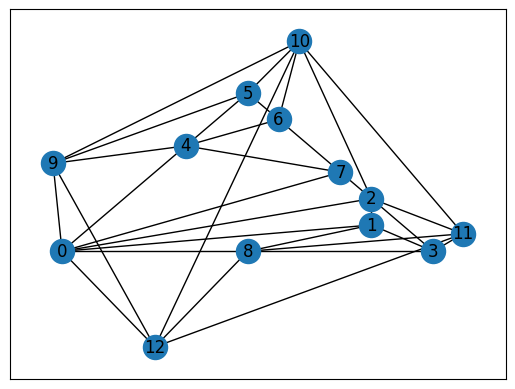

In [8]:
plot_planar(G, embed)

## start ordering... 

In [9]:
def create_next_graphs(G, subgraph_nodes):
    G_k_minus = nx.subgraph(G, subgraph_nodes)
    G_diff = nx.subgraph(G, set(G.nodes).difference(set(G_k_minus.nodes)))
    return G_k_minus, G_diff

In [10]:
# set starting canonical 
G.nodes[get_node_index("south")]["canonical_order"] = 1
G.nodes[get_node_index("west")]["canonical_order"] = 2


# define the subgraph 
subgraph_nodes = []
subgraph_nodes.extend([get_node_index("south"), get_node_index("west")])
G_k_minus, G_diff = create_next_graphs(G, subgraph_nodes)


for order in range(2, len(G.nodes)):

    # find next node -> shared nb of past nodes which is in G_diff 
    v1 = subgraph_nodes[-2]
    v2 = subgraph_nodes[-1]
    candidate_nodes = [n for n in G.neighbors(v1) if n in G.neighbors(v2)]
    candidate_nodes_in_G_diff = list(set(candidate_nodes).intersection(set(G_diff.nodes)))
    # ic((v1, v2), candidate_nodes, candidate_nodes_in_G_diff)

    # # check part 3 of refined canonical order theorem -> candidate node has two nbs in G_diff
    for node in candidate_nodes_in_G_diff:
        true_candidate_nodes = [] # TODO rename 

        neighbours = {n for n in G.neighbors(node)}

        if len(set(G_diff.nodes).intersection(neighbours)) >= 2:
            true_candidate_nodes.append(node)
        elif len(G_diff.nodes) <= 2: 
            true_candidate_nodes.append(node)

        assert len(true_candidate_nodes) == 1, "candidate nodes are invalid!"

    next_node = true_candidate_nodes[0]
    # ic((true_candidate_nodes, next_node))


    G.nodes[next_node]["canonical_order"] = order

    subgraph_nodes.append(next_node)
    G_k_minus, G_diff = create_next_graphs(G, subgraph_nodes)

    # check part 1 or theorem G_k_minus is bi-connected, and its boundary has correct edge..
    a = Augment(G_k_minus)
    a.G_biconnect = G_k_minus
    a.test_biconnect()

    # correct edge check 
    if len(G_k_minus.nodes) >=3:
        b = Boundaries(G_k_minus, p.b.embed) # wghat about when G_k_minus smaller than embed?
        b.find_boundary_points()
        b.find_boundary_edges()
        try:
            b.find_cips()
            b.find_boundary_cycle()
            b.boundary_cycles
            ic(subgraph_nodes[0:2], b.boundary_cycles)
        except:
            ic(b.boundary_nodes, b.boundary_edges)

ic| b.boundary_nodes: array([ 0,  3,  9, 10, 11, 12], dtype=int32)
    b.boundary_edges: [(9, 10)]


ic| b.boundary_nodes: array([ 0,  3,  9, 10, 11, 12], dtype=int32)
    b.boundary_edges: [(9, 10)]
ic| b.boundary_nodes: array([ 0,  3,  9, 10, 11, 12], dtype=int32)
    b.boundary_edges: [(9, 10)]
ic| b.boundary_nodes: array([ 0,  3,  9, 10, 11, 12], dtype=int32)
    b.boundary_edges: [(9, 10)]
ic| b.boundary_nodes: array([ 0,  3,  9, 10, 11, 12], dtype=int32)
    b.boundary_edges: [(9, 10)]
ic| subgraph_nodes[0:2]: [12, 9], b.boundary_cycles: [0, 9, 10, 12]
ic| subgraph_nodes[0:2]: [12, 9], b.boundary_cycles: [0, 9, 10, 12]
ic| subgraph_nodes[0:2]: [12, 9], b.boundary_cycles: [0, 9, 10, 12]
ic| subgraph_nodes[0:2]: [12, 9], b.boundary_cycles: [0, 9, 10, 12]
ic| subgraph_nodes[0:2]: [12, 9], b.boundary_cycles: [0, 9, 10, 12]
ic| subgraph_nodes[0:2]: [12, 9], b.boundary_cycles: [0, 9, 10, 12]


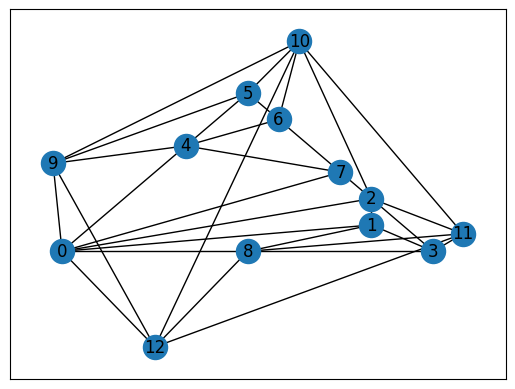

In [11]:
plot_planar(G_k_minus, embed)

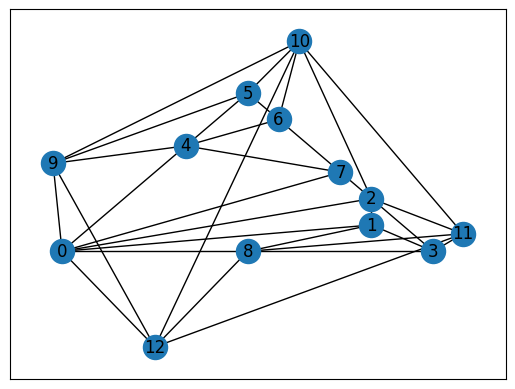

In [12]:
plot_planar(G_k_minus, p.b.embed)

In [13]:
# embed = nx.planar_layout(G_k_minus)
b = Boundaries(G_k_minus, p.b.embed) # wghat about when G_k_minus smaller than embed?
b.find_boundary_points()
b.find_boundary_edges()
b.find_cips()
b.find_boundary_cycle()
b.boundary_cycles
subgraph_nodes

[12, 9, 10, 5, 6, 4, 7, 0, 2, 1, 3, 8, 11]

In [14]:
b.boundary_nodes

array([ 0,  3,  9, 10, 11, 12], dtype=int32)